<a href="https://colab.research.google.com/github/Amit1076-cloud/Amit-ipl/blob/main/Predict_Osteoporosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the dataset
df = pd.read_csv('/content/osteoporosis (1).csv')
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


#Data Preprocessing



In [3]:
 # shafe of data
 df.shape

(1958, 16)

In [4]:
# check info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

#### observation
1. few columns have missing values


In [5]:
 # check for missing values
 df.isnull()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1954,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
1955,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1956,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [6]:
df.isnull().any()

,0
Id,False
Age,False
Gender,False
Hormonal Changes,False
Family History,False
Race/Ethnicity,False
Body Weight,False
Calcium Intake,False
Vitamin D Intake,False
Physical Activity,False


In [7]:
df.columns[df.isnull().any()]

Index(['Alcohol Consumption', 'Medical Conditions', 'Medications'], dtype='object')

In [8]:
# check the missing values
cols_with_missing_values = df.columns[df.isnull().any()]
cols_with_missing_values

Index(['Alcohol Consumption', 'Medical Conditions', 'Medications'], dtype='object')

In [9]:
# missing values percentage
#The 'print' function was likely reassigned. To fix this, restart the kernel or avoid reassigning built-in function names.
#del print  # Delete the variable that overwrites the built-in function # Commented out the line causing the error.
print("% of missing values") # Use the original print function
for col in cols_with_missing_values:
  print(col," - ",(df[col].isnull().sum())/df.shape[0] *100, "%")

% of missing values
Alcohol Consumption  -  50.45965270684371 %
Medical Conditions  -  33.04392236976506 %
Medications  -  50.30643513789581 %


In [10]:
df.fillna("None ",inplace=True)
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [11]:
df.isnull().sum()

,0
Id,0
Age,0
Gender,0
Hormonal Changes,0
Family History,0
Race/Ethnicity,0
Body Weight,0
Calcium Intake,0
Vitamin D Intake,0
Physical Activity,0


In [12]:
df = df.drop('Id',axis=1)

In [13]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1958 non-null   int64 
 1   Gender               1958 non-null   object
 2   Hormonal Changes     1958 non-null   object
 3   Family History       1958 non-null   object
 4   Race/Ethnicity       1958 non-null   object
 5   Body Weight          1958 non-null   object
 6   Calcium Intake       1958 non-null   object
 7   Vitamin D Intake     1958 non-null   object
 8   Physical Activity    1958 non-null   object
 9   Smoking              1958 non-null   object
 10  Alcohol Consumption  1958 non-null   object
 11  Medical Conditions   1958 non-null   object
 12  Medications          1958 non-null   object
 13  Prior Fractures      1958 non-null   object
 14  Osteoporosis         1958 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 229.6+ KB


In [15]:
 # cat_columns = df.select_dtypes(include=['object']).columns
 # cat_columns

 num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
 cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

 # print columns
 print('We have {} numerical features : {}'.format(len(num_features), num_features))
 print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))

We have 2 numerical features : ['Age', 'Osteoporosis']

We have 13 categorical features : ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']


In [16]:
for feature in cat_features:
  print(f"\ncategories in {feature} variable: ", end= " ")
  print(df[feature].unique())
  print(df[feature].value_counts())



categories in Gender variable:  ['Female' 'Male']
Gender
Male      992
Female    966
Name: count, dtype: int64

categories in Hormonal Changes variable:  ['Normal' 'Postmenopausal']
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64

categories in Family History variable:  ['Yes' 'No']
Family History
No     998
Yes    960
Name: count, dtype: int64

categories in Race/Ethnicity variable:  ['Asian' 'Caucasian' 'African American']
Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64

categories in Body Weight variable:  ['Underweight' 'Normal']
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64

categories in Calcium Intake variable:  ['Low' 'Adequate']
Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64

categories in Vitamin D Intake variable:  ['Sufficient' 'Insufficient']
Vitamin D Intake
Sufficient      1011
Insufficient     947
Name: coun

In [17]:
df.describe()

,Age,Osteoporosis
count,1958.000000,1958.000000
mean,39.101124,0.500000
std,21.355424,0.500128
min,18.000000,0.000000
25%,21.000000,0.000000
50%,32.000000,0.500000
75%,53.000000,1.000000
max,90.000000,1.000000


#### observation
1. we have replaced Null values with "None".
2. there are 13 categories and 2 numerical features.

# Explore Data (Visualization)

EDA-Exploratory Data Analysis

In [18]:
# distribtuion of target variable
df['Osteoporosis'].value_counts()

,count
Osteoporosis,
1,979
0,979


Text(0.5, 1.0, 'Osteoporosis Distribution')

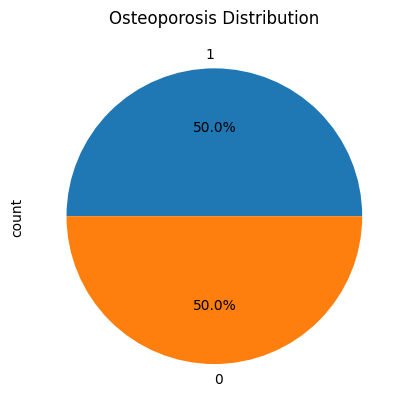

In [19]:
# Distribution of target variable
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Osteoporosis Distribution')

#### observation
we have perfectly balanced dataset i.e., dataset in not biesed

<Axes: xlabel='Age', ylabel='Count'>

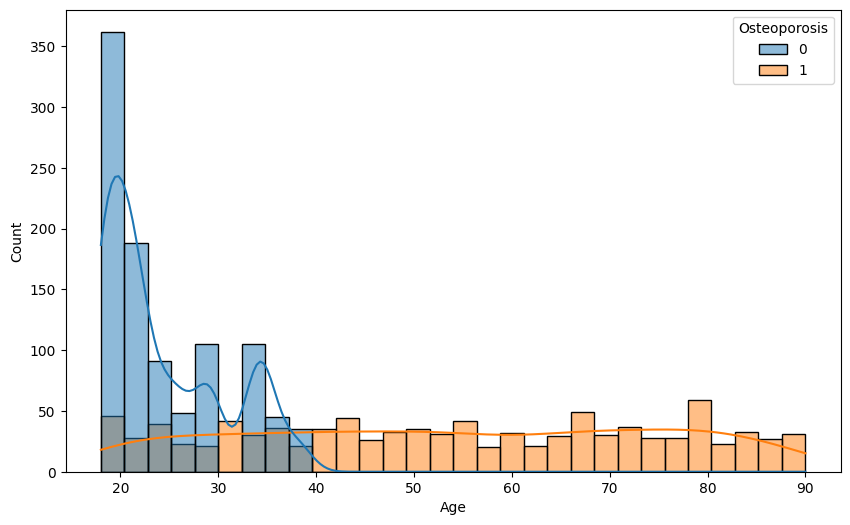

In [20]:
  plt.figure(figsize=(10, 6))
  sns.histplot(data = df, x = 'Age', bins = 30, kde = True, hue='Osteoporosis')


Text(0, 0.5, 'Osteoporosis')

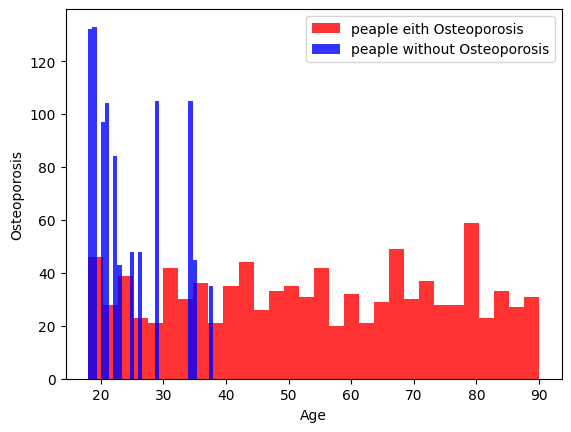

In [21]:
df[df['Osteoporosis']==1]['Age'].plot.hist(bins=30, alpha = 0.8, color='red', label = 'peaple eith Osteoporosis')
df[df['Osteoporosis']==0]['Age'].plot.hist(bins=30, alpha = 0.8, color='blue', label = 'peaple without Osteoporosis')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Osteoporosis')

#### observation
people with higher age (age>40)have higher risk of having as Osteoporosis as comparison to lower age(age<40)

Text(0.5, 1.0, 'Gender vs Osteoporosis')

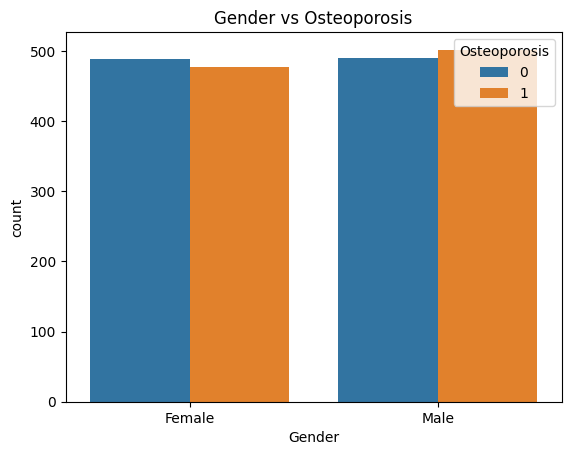

In [22]:


sns.countplot(x ='Gender',data=df, hue='Osteoporosis').set_title('Gender vs Osteoporosis')

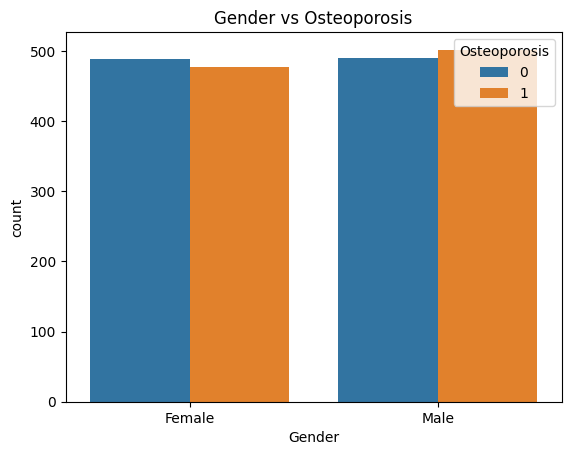

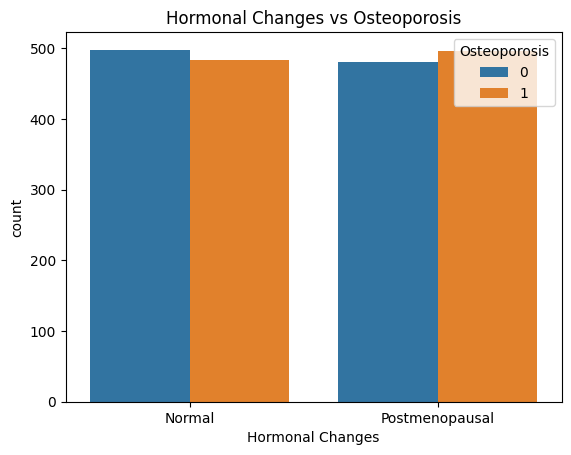

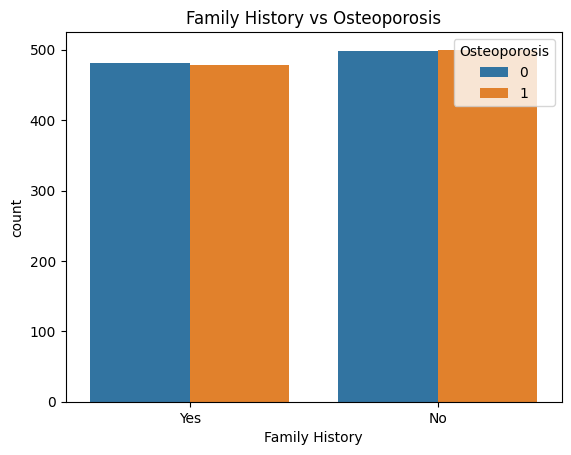

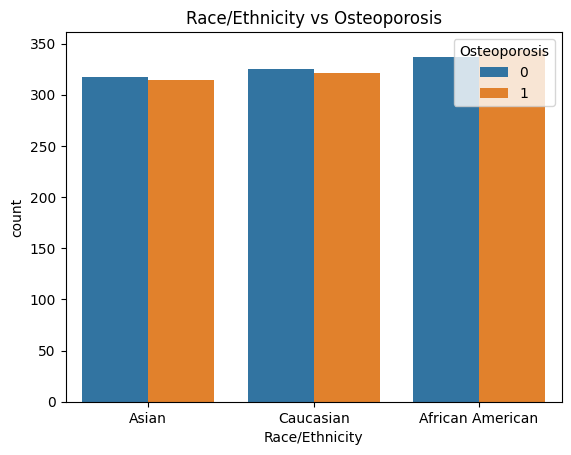

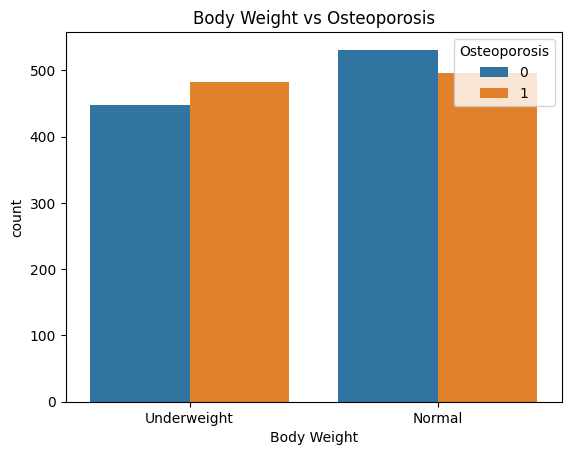

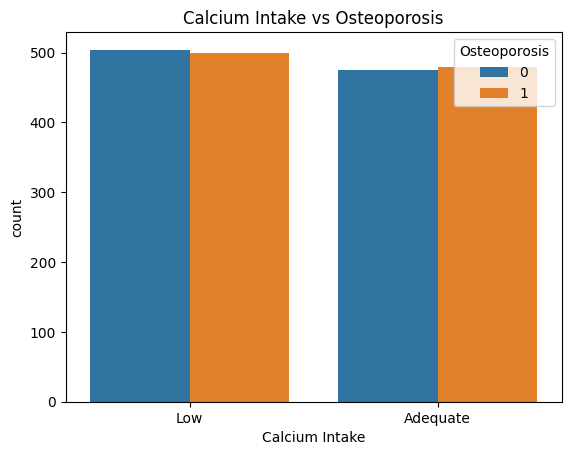

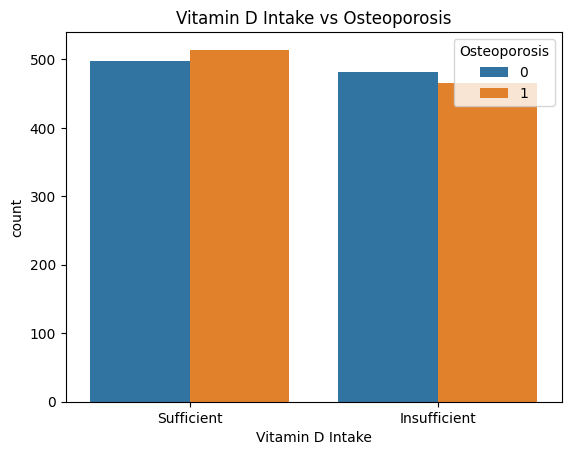

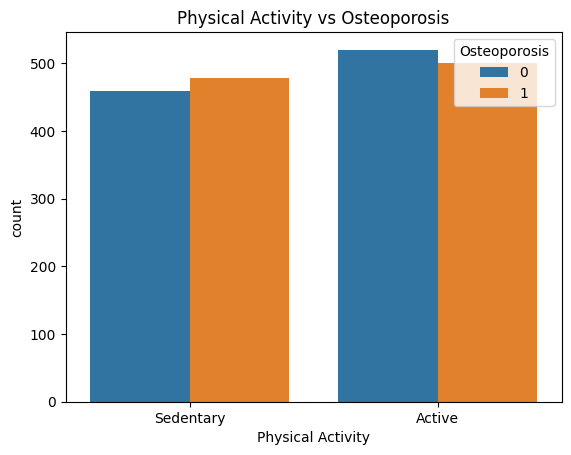

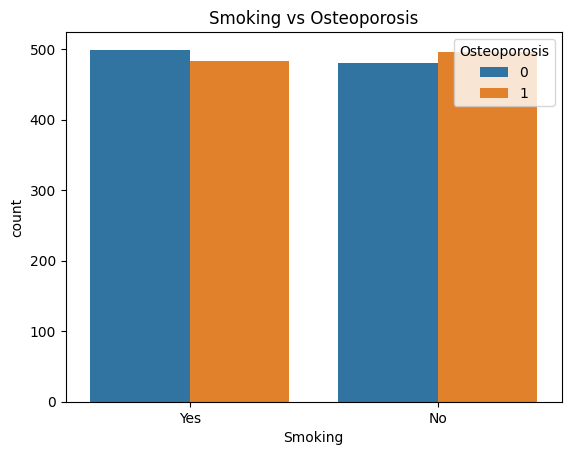

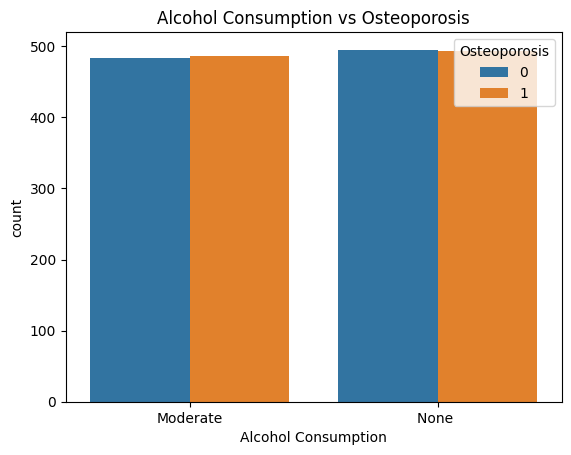

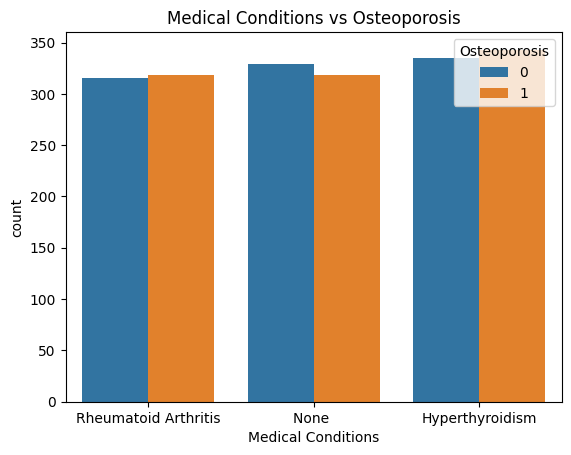

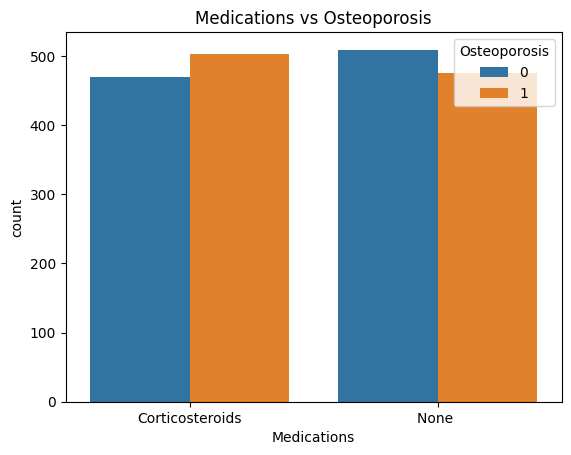

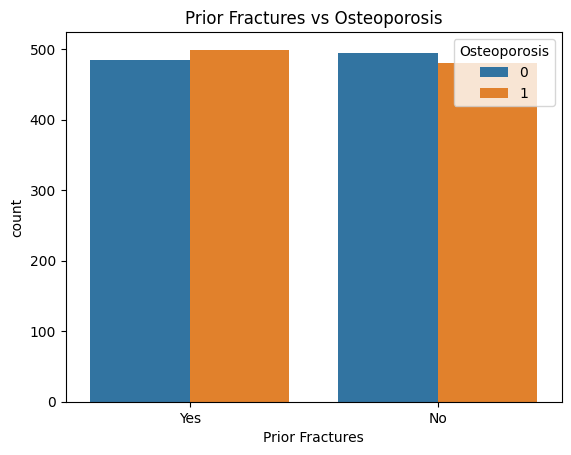

In [23]:
for feature in cat_features:
  sns.countplot(x = feature, data = df, hue = 'Osteoporosis').set_title(feature + ' vs Osteoporosis')
  plt.show()

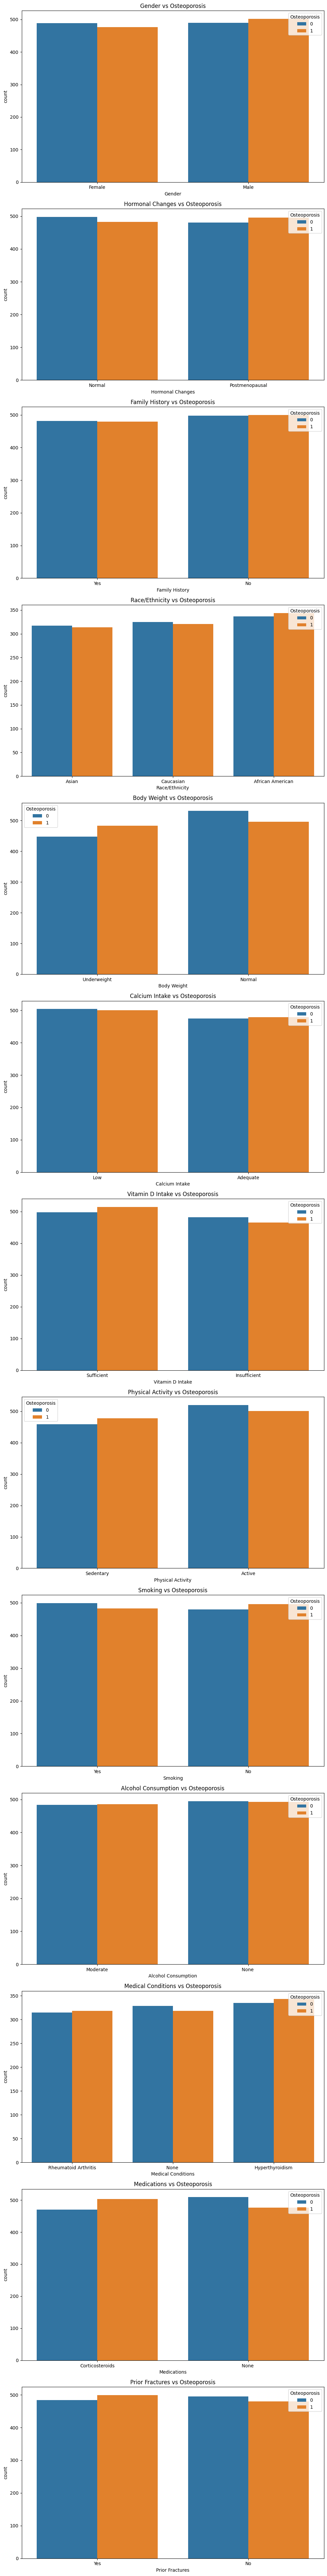

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cat_features' is a list of your categorical features and 'df' is your DataFrame

fig, axes = plt.subplots(len(cat_features), 1, figsize=(10, 6 * len(cat_features)))  # Adjust figsize as needed

for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, data=df, hue='Osteoporosis', ax=axes[i])  # Plotting on subplots
    axes[i].set_title(feature + ' vs Osteoporosis')  # Setting subplot titles

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the figure with subplots

# future Engineering

In [25]:
# label Encoding of Categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in cat_features:
  df[feature] = le.fit_transform(df[feature])
  print(feature, ":",df[feature].unique())

Gender : [0 1]
Hormonal Changes : [0 1]
Family History : [1 0]
Race/Ethnicity : [1 2 0]
Body Weight : [1 0]
Calcium Intake : [1 0]
Vitamin D Intake : [1 0]
Physical Activity : [1 0]
Smoking : [1 0]
Alcohol Consumption : [0 1]
Medical Conditions : [2 1 0]
Medications : [0 1]
Prior Fractures : [1 0]


In [26]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1


<Axes: >

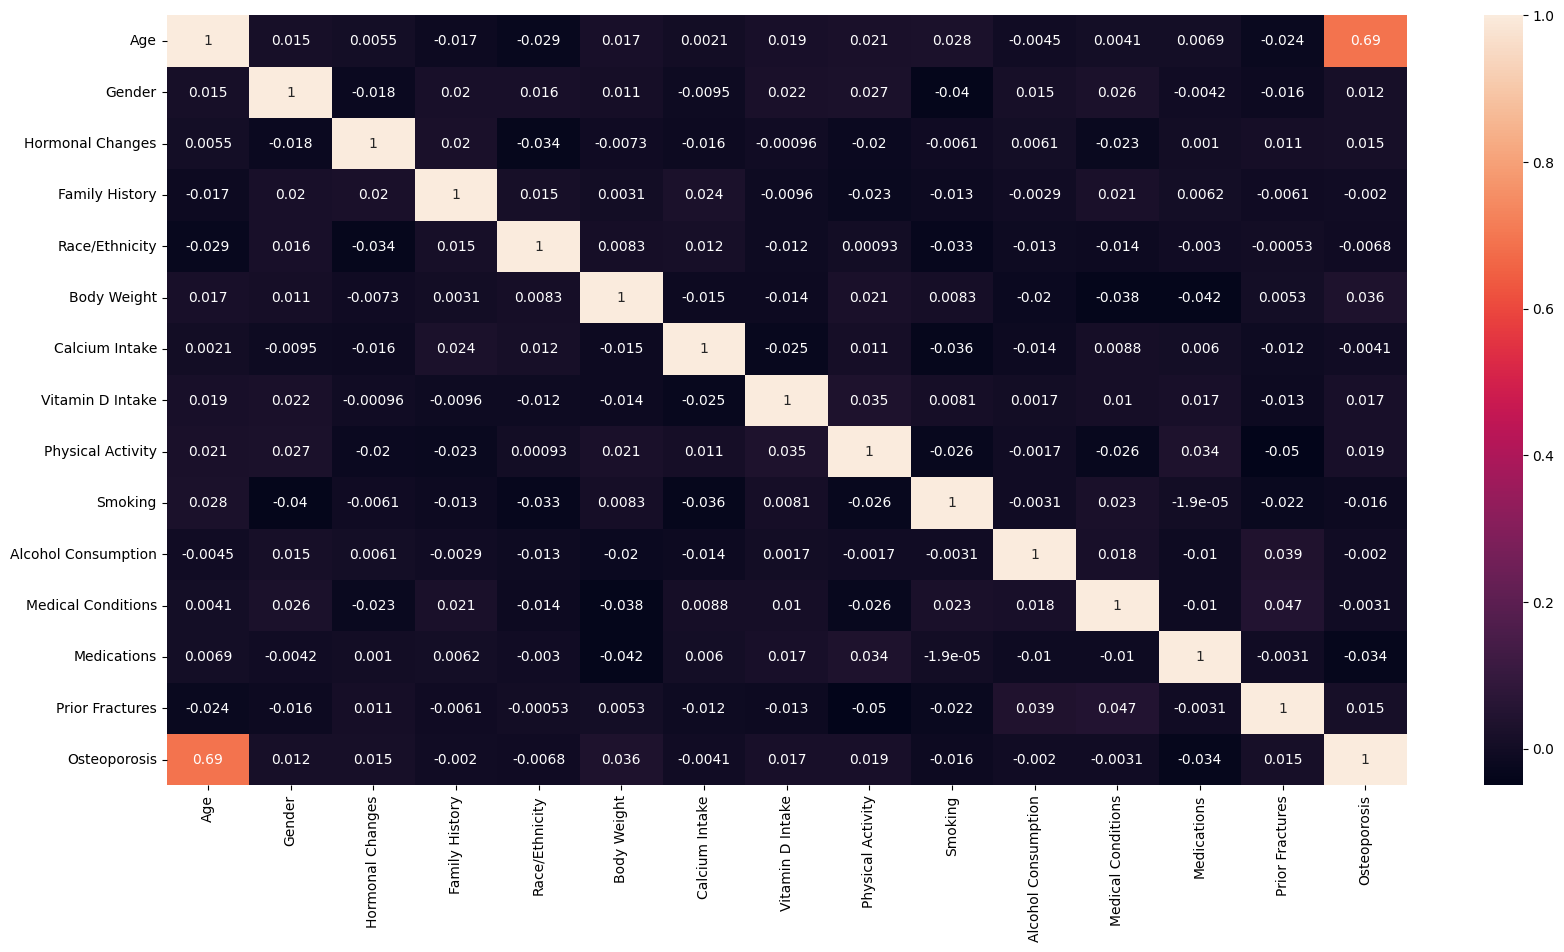

In [27]:
# correlation
corr_matrix = df.corr()

plt.figure(figsize=(20,10))

sns.heatmap(corr_matrix, annot=True)



#### observation
1.Age is highly correlated.
2.most of the features are less correlates.
3.BodyWeaight, Gender,Medical Conditions are also correlated

### Train test split

In [28]:
 x = df.drop('Osteoporosis', axis=1)
y = df['Osteoporosis']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [30]:
print(f'Size of x_train: {x_train.shape}')
print(f'Size of x_test: {x_test.shape}')

print(f'Size of y_train: {y_train.shape}')
print(f'Size of y_test: {y_test.shape}')

Size of x_train: (1370, 14)
Size of x_test: (588, 14)
Size of y_train: (1370,)
Size of y_test: (588,)


# Model Training

1.Logistic Regression
2.RF
3.SVM
4.DT


Logistic Regresion

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [32]:
lr.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = lr.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

print("Training Score: ", lr.score(x_train, y_train))
print("Testing Score: ", lr.score(x_test, y_test))


Training Score:  0.8306569343065694
Testing Score:  0.8214285714285714


# Hyper parameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
lr = LogisticRegression()

# Define the parameter grid with compatible combinations
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2','elastincnet',None],  # Removed 'elasticnet', None as they are not always compatible with all solvers
    'solver': ['liblinear', 'newton-cg'], # Use solvers that support both l1 and l2 penalties. Removed 'newton-cg' as it does not.
    'max_iter': [100, 1000, 2000, 5000],

    'random_state': [0, 42, 101]
}

# Create GridSearchCV object
grid = GridSearchCV(lr, param_grid, refit=True, verbose=3, cv=5, n_jobs=-1)

# Fit the model
grid.fit(x_train, y_train)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 2000, 5000],
                         'penalty': ['l1', 'l2', 'elastincnet', None],
                         'random_state': [0, 42, 101],
                         'solver': ['liblinear', 'newton-cg']},
             verbose=3)

In [36]:
#best parameters
grid.best_params_

{'C': 1,
 'max_iter': 100,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear'}

In [37]:
lr = LogisticRegression(C= 1,
                        max_iter =100,
                        penalty ='l2',
                        random_state =0,
                        solver ='liblinear')

#fit

lr.fit(x_train, y_train)

#predict
lr_pred =lr.predict(x_test) # Removed the extra space at the beginning of this line

#accuracy

print("Training Score: ", lr.score(x_train, y_train))

print("Testing Score: ", accuracy_score(y_test, lr_pred))


Training Score:  0.8343065693430657
Testing Score:  0.826530612244898


#### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [39]:
dt.fit(x_train, y_train)
#predict
dt_pred = dt.predict(x_test)

#accuracy
print("Training Score: ", dt.score(x_train, y_train))
print("Testing Score: ", accuracy_score(y_test, dt_pred))

Training Score:  0.9985401459854014
Testing Score:  0.8299319727891157


#### Hyperperameter Tuning

In [40]:
#parameters
param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[10,20,40,30],
              'min_samples_split':[2,4,5,10],
              'min_samples_leaf':[2,4,5,10],
              'random_state':[0,42,101]}

grid = GridSearchCV(dt, param_grid, refit=True, verbose=3, cv=5, n_jobs=-1)

#fit
grid.fit(x_train, y_train)
print(grid.best_params_)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 0}


In [41]:
dt = DecisionTreeClassifier(criterion ='gini',
                            max_depth = 10,
                            min_samples_split = 2,
                            min_samples_leaf = 10,
                            random_state = 0)
dt.fit(x_train, y_train)
#predict
dt_pred = dt.predict(x_test)

#accuracy
print("Training Score: ", dt.score(x_train, y_train))
print("Testing Score: ", accuracy_score(y_test, dt_pred))

Training Score:  0.9131386861313868
Testing Score:  0.8928571428571429


#### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [43]:
rf.fit(x_train,y_train)

#accuracy
print("Training Score: ", rf.score(x_train, y_train)) # Fixed indentation and changed X_train to x_train
print("Testing Score: ", rf.score(x_test, y_test)) # Changed X_test to x_test

Training Score:  0.9985401459854014
Testing Score:  0.8520408163265306


#### Hyper parameter tuning

In [55]:
param_grid = {
    'n_estimators':[10, 50, 100, ],
    'criterion':['gini', 'entropy'],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[2,5,10],
    'random_state':[0,42,101],
    'max_features':['auto','sqrt','log2']
}

grid = GridSearchCV(rf,param_grid, refit=True, verbose=3, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
print('RandomForest Parameters: ',grid.best_param_)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


KeyboardInterrupt: 

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()



In [61]:
rf = RandomForestClassifier(
    n_estimators = 100,
    criterion = 'entropy',
    max_depth = 10,
    min_samples_leaf = 2,
    min_samples_split = 2,
    random_state = 42,

)
rf.fit(x_train, y_train)

#accuracy
print("Training Score: ", rf.score(x_train, y_train))
print("Testing Score: ", rf.score(x_test, y_test))

Training Score:  0.9386861313868613
Testing Score:  0.8605442176870748


# Support Vactor Classifier

In [58]:
from sklearn.svm import SVC
svc = SVC()

In [59]:
svc.fit(x_train, y_train)

#accuracy
print("Training Score: ", svc.score(x_train, y_train))
print("Testing Score: ", svc.score(x_test, y_test))

Training Score:  0.8474452554744526
Testing Score:  0.8452380952380952


#### Hyper parameter tuning

In [63]:
param_grid = {
    'C':[1, 10, 100],
    'degree':[2,3,4,5],
    'gamma':['scale', 'auto'],
    'random_state':[0,42,101]
}

grid = GridSearchCV(svc, param_grid, refit=True, verbose=3, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
print('Best Parameters',grid.best_params_)

grid = GridSearchCV(svc, param_grid, refit=True, verbose=3, cv=5, n_jobs=-1)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters {'C': 1, 'degree': 2, 'gamma': 'auto', 'random_state': 0}


In [64]:
svc = SVC(
    C = 1,
    degree = 2,
    gamma = 'auto',
    random_state = 0
)

svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

#accuracy
print("Training Score: ", svc.score(x_train, y_train))
print("Testing Score: ", accuracy_score(y_test, svc_pred))
#

Training Score:  0.8773722627737226
Testing Score:  0.8707482993197279


In [69]:
# print accuracy score of all algo
print("===Testing Accuracy === \n")
print("Logistic Regression Testiing Accuracy: ", accuracy_score(y_test, lr_pred)*100)
print("Decision Tree classifier Testing Accuracy :", accuracy_score(y_test, dt_pred)*100)
print("Random Forest Classifier Testing Accuracy :", accuracy_score(y_test, lr_pred)*100)
print("Support Vector Classifier Testing Accuracy :", accuracy_score(y_test, svc_pred)*100)

print("\n===Traning Accuracy===\n")
print("Logistic Regression Traning Accuracy: ", lr.score(x_train, y_train)*100)
print("Decision Tree classifier Traning Accuracy :", dt.score(x_train, y_train)*100)
print("Random Forest Classifier Traning Accuracy :", rf.score(x_train, y_train)*100)



===Testing Accuracy === 

Logistic Regression Testiing Accuracy:  82.6530612244898
Decision Tree classifier Testing Accuracy : 89.28571428571429
Random Forest Classifier Testing Accuracy : 82.6530612244898
Support Vector Classifier Testing Accuracy : 87.07482993197279

===Traning Accuracy===

Logistic Regression Traning Accuracy:  83.43065693430657
Decision Tree classifier Traning Accuracy : 91.31386861313868
Random Forest Classifier Traning Accuracy : 93.86861313868613


# model Evaluation
# Confusion matrix

In [70]:
from sklearn.metrics import confusion_matrix

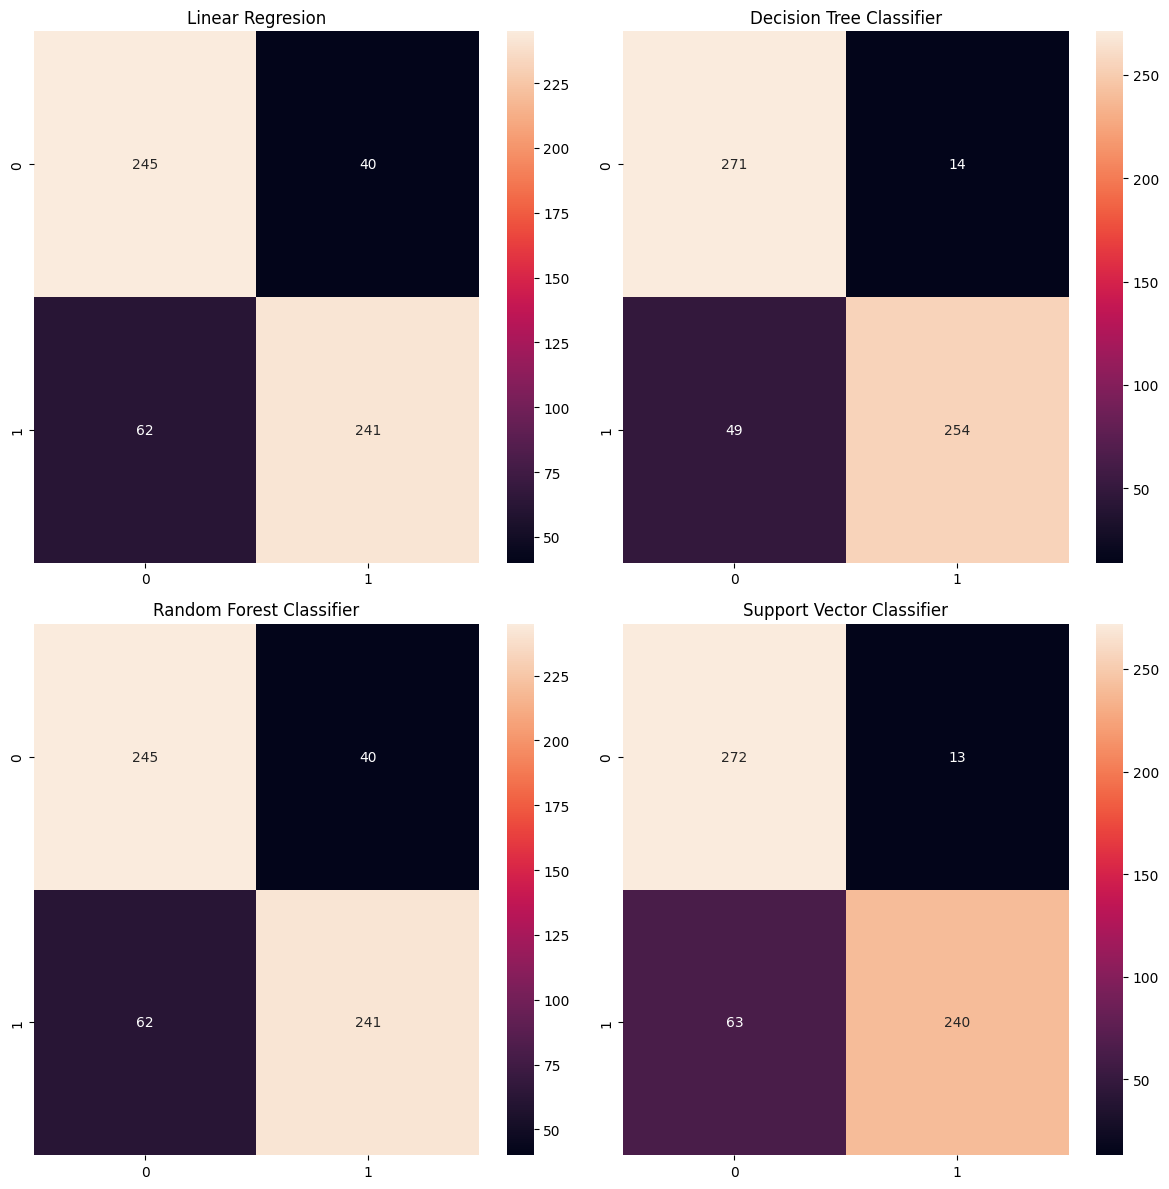

In [78]:
fig, ax = plt.subplots(2,2, figsize =(12,12))

lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True,ax=ax[0,0], fmt='g').set_title("Linear Regresion")

dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True,ax=ax[0,1], fmt='g').set_title("Decision Tree Classifier")

lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True,ax=ax[1,0], fmt='g').set_title("Random Forest Classifier")

svc_cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(svc_cm, annot=True,ax=ax[1,1], fmt='g').set_title("Support Vector Classifier")

plt.tight_layout()

## model Accuracy plot

In [79]:
# print accuracy score of all algo
print("===Testing Accuracy === \n")
print("Logistic Regression Testiing Accuracy: ", accuracy_score(y_test, lr_pred)*100)
print("Decision Tree classifier Testing Accuracy :", accuracy_score(y_test, dt_pred)*100)
print("Random Forest Classifier Testing Accuracy :", accuracy_score(y_test, lr_pred)*100)
print("Support Vector Classifier Testing Accuracy :", accuracy_score(y_test, svc_pred)*100)

print("\n===Traning Accuracy===\n")
print("Logistic Regression Traning Accuracy: ", lr.score(x_train, y_train)*100)
print("Decision Tree classifier Traning Accuracy :", dt.score(x_train, y_train)*100)
print("Random Forest Classifier Traning Accuracy :", rf.score(x_train, y_train)*100)


===Testing Accuracy === 

Logistic Regression Testiing Accuracy:  82.6530612244898
Decision Tree classifier Testing Accuracy : 89.28571428571429
Random Forest Classifier Testing Accuracy : 82.6530612244898
Support Vector Classifier Testing Accuracy : 87.07482993197279

===Traning Accuracy===

Logistic Regression Traning Accuracy:  83.43065693430657
Decision Tree classifier Traning Accuracy : 91.31386861313868
Random Forest Classifier Traning Accuracy : 93.86861313868613


Text(0.5, 1.0, 'Model Accuracy')

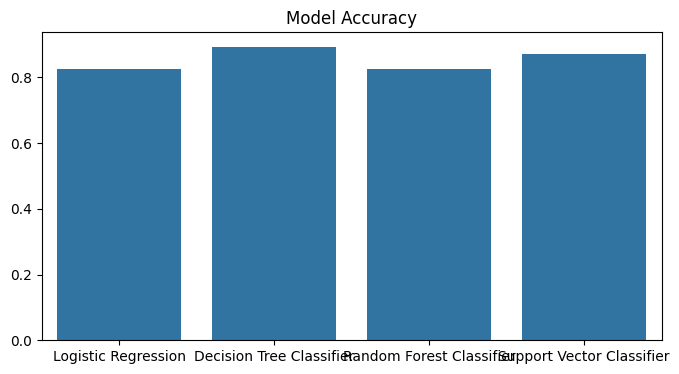

In [81]:
# bar chart
models =['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Classifier']
accuracy = [accuracy_score(y_test,lr_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, svc_pred)]

plt.figure(figsize=(8,4))
sns.barplot(x=models, y=accuracy).set_title('Model Accuracy')



#Observation

Decision Tree has highest Accuracy among all

In [82]:
#Model metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_log_error

In [83]:
mse =[mean_squared_error(y_test,lr_pred),
      mean_squared_error(y_test,dt_pred),
      mean_squared_error(y_test,lr_pred),
      mean_squared_error(y_test,svc_pred)]

mae = [mean_absolute_error(y_test,lr_pred),
       mean_absolute_error(y_test,dt_pred),
       mean_absolute_error(y_test,lr_pred),
       mean_absolute_error(y_test,svc_pred)]

rmse = [np.sqrt(mean_squared_error(y_test,lr_pred)),
        np.sqrt(mean_squared_error(y_test,dt_pred)),
        np.sqrt(mean_squared_error(y_test,lr_pred)),
        np.sqrt(mean_squared_error(y_test,svc_pred))]

r2_score = [r2_score(y_test,lr_pred),
            r2_score(y_test,dt_pred),
            r2_score(y_test,lr_pred),
            r2_score(y_test,svc_pred)]

In [ ]:
#Create plot

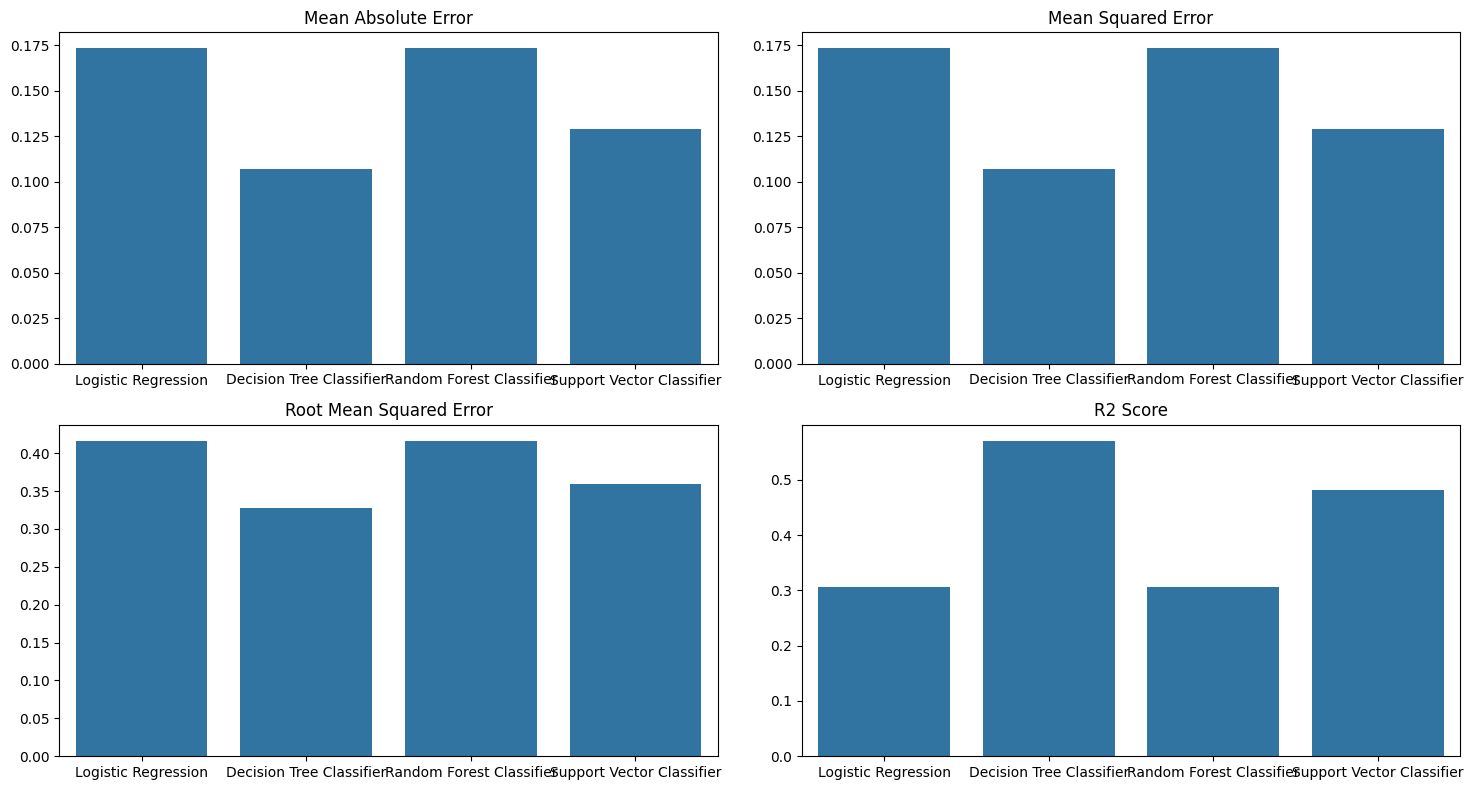

In [87]:
 fig, ax = plt.subplots(2,2, figsize=(15,8))

 #Create plot
 sns.barplot(x = models, y = mae, ax = ax[0,0]).set_title("Mean Absolute Error")
 sns.barplot(x = models, y = mse, ax = ax[0,1]).set_title("Mean Squared Error")
 sns.barplot(x = models, y = rmse, ax = ax[1,0]).set_title("Root Mean Squared Error")
 sns.barplot(x = models, y = r2_score, ax = ax[1,1]).set_title("R2 Score")

 plt.tight_layout()

In [90]:
featureImp = list(dt.feature_importances_)
labels = list(x.columns)
features= pd.DataFrame()
features['features'] = labels
features['importance'] = featureImp

features

,features,importance
0,Age,0.924320
1,Gender,0.001388
2,Hormonal Changes,0.007560
3,Family History,0.011689
4,Race/Ethnicity,0.010270
5,Body Weight,0.006486
6,Calcium Intake,0.002922
7,Vitamin D Intake,0.003512
8,Physical Activity,0.000907
9,Smoking,0.005059


In [93]:
features.sort_values(by=['importance'], ascending=True, inplace=True)
features

,features,importance
8,Physical Activity,0.000907
1,Gender,0.001388
6,Calcium Intake,0.002922
13,Prior Fractures,0.003264
7,Vitamin D Intake,0.003512
9,Smoking,0.005059
10,Alcohol Consumption,0.005175
12,Medications,0.005510
5,Body Weight,0.006486
2,Hormonal Changes,0.007560


In [107]:
features = features.set_index('features')


KeyError: "None of ['features'] are in the columns"

Text(0.5, 1.0, 'feature importance')

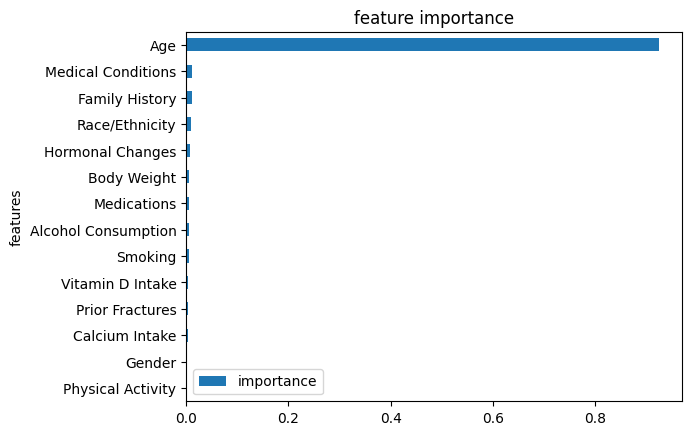

In [108]:
features.plot(kind='barh').set_title('feature importance')

In [109]:
lr.coef_[0]

array([ 0.14760861,  0.01665666,  0.10221567, -0.00605191, -0.00690438,
       -0.12193709, -0.04411637, -0.02112862,  0.05599176, -0.44768551,
       -0.05181075, -0.14783825, -0.3619153 ,  0.01303258])

Text(0.5, 1.0, 'feature importance of logistic Regresion')

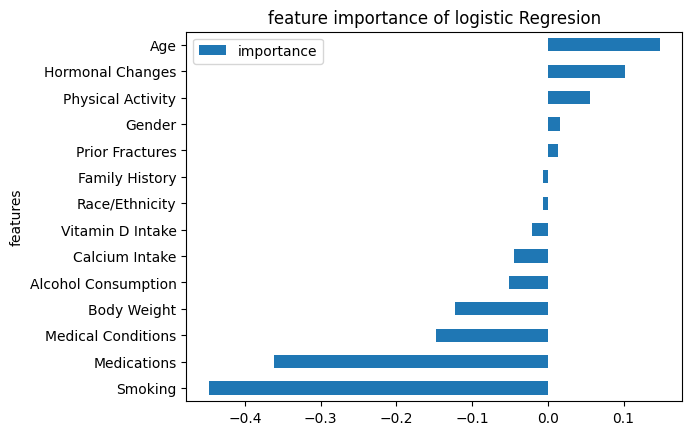

In [110]:
featureImp = list(lr.coef_[0])
labels = list(x.columns)
features= pd.DataFrame()
features['features'] = labels
features['importance'] = featureImp

features.sort_values(by=['importance'], ascending=True, inplace=True)
features = features.set_index('features')
features.plot(kind='barh').set_title('feature importance of logistic Regresion')

